In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn import preprocessing

# Agrupamiento Jerarquico

In [8]:
#Apertura de archivo csv a un dataframe de pandas

#revisar la ruta para tu caso particular
ruta = "c:\\Users\\jrgui\\Documents\\GitHub\\Machine_Learning\\Agrupamiento\\datasets\\Mall_Customers.csv"
dataset = pd.read_csv(ruta)
dataset.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
#Sacar las variables 
X = dataset.iloc[:,[3,4]].values

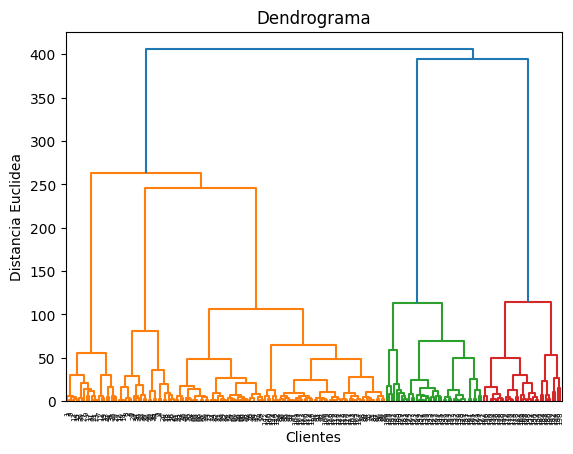

In [10]:
# Dendrograma para saber el numero de k optimo

import scipy.cluster.hierarchy as sch

dendograma = sch.dendrogram(sch.linkage(X, method="ward"))

#Grafica
plt.title("Dendrograma")
plt.xlabel("Clientes")
plt.ylabel("Distancia Euclidea")
plt.show()


#Como escoge el K:
#Se debe trazar una linea horizontal en el segmento de recta vertical mas largo, que no es cortado
#por alguna linea horizontal del dendrograma.

#En el caso particular de nuestro grafico, se ve que las lineas vertical mas largas son las azules 
#que se observa a la derecha, pero estan divididas por dos lineas naranjas horizontales por la 
#izquierda, por ello la linea vertical mas larga siguen siendo las lienas azules, pero de la mitad
#hacia abajo. Si colocasemos una linea horizontal en ese punto seria cortada por 5 lienas verticales,
#ese deberia ser nuestro numero de k, k=5



In [11]:
#Ajustar el metodo de agrupamiento jerarquico

from sklearn.cluster import AgglomerativeClustering

#Inicializacion del objeto para crear en agrupamiento
aj = AgglomerativeClustering(n_clusters=5, linkage="ward")

#ajuste y predicciones 
y_pred = aj.fit_predict(X)

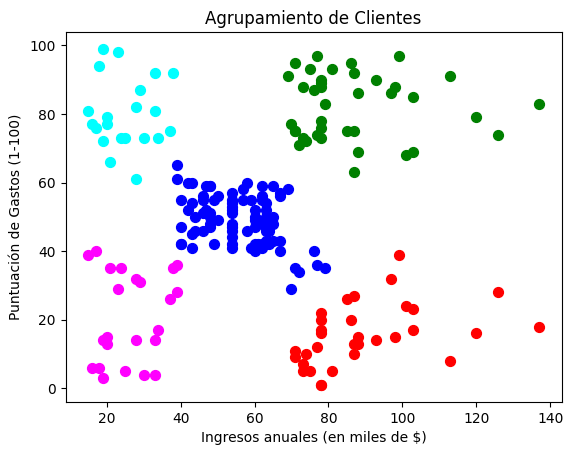

In [12]:
# Visualización de los grupos
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 50, c = "red", label = "Cautos")
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 50, c = "blue", label = "Estandard")
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 50, c = "green", label = "Objetivo")
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 50, c = "cyan", label = "Descuidados")
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 50, c = "magenta", label = "Conservadores")
plt.title("Agrupamiento de Clientes")
plt.xlabel("Ingresos anuales (en miles de $)")
plt.ylabel("Puntuación de Gastos (1-100)")
#plt.legend()
plt.show()